In [1]:
from pykrx import stock
from pykrx import bond
import FinanceDataReader as fdr

from IPython.display import Image
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


import warnings
warnings.filterwarnings(action='ignore')

#-------------------- 차트 관련 속성 (한글처리, 그리드) -----------
sns.set()
#plt.rc('font', family='NanumGothicOTF') # For MacOS
plt.rcParams['font.family']= 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False


#-------------------- 주피터 , 출력결과 넓이 늘리기 ---------------
from IPython.core.display import display, HTML
display(HTML("<style>.container{width:100% !important;}</style>"))
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
pd.set_option('max_colwidth', None)

# 기준 금리 변화와 부동산, 대출

# Data Load

<img src = './데이터 출처.png'>

- 분석 기간 : 2012년 07월 - 2022년 12월
- 분석 지역 : 수도권 주택

In [2]:
기준금리_df=pd.read_csv("./datasets/기준금리.csv",parse_dates=['Unnamed: 0'])#,index_col=['Unnamed: 0'])
소비심리지수_df=pd.read_csv("./datasets/소비심리지수.csv",parse_dates=['시점'])
고정변동_df=pd.read_csv("./datasets/고정변동.csv",parse_dates=['시점'])
수도권아파트매매가_df=pd.read_csv("./datasets/수도권아파트매매가.csv",parse_dates=['Unnamed: 0'])
아파트매매거래량_증감_df=pd.read_csv("./datasets/아파트매매거래량_증감.csv",parse_dates=['Unnamed: 0'])
압력지수_df=pd.read_csv("./datasets/압력지수.csv",parse_dates=['Unnamed: 0'])
주담대금리_df=pd.read_csv("./datasets/주담대금리.csv",parse_dates=['Unnamed: 0'])
주택매매거래량_df=pd.read_csv("./datasets/주택매매거래량.csv",parse_dates=['Unnamed: 0'])
주택매매시장_소비심리지수_df=pd.read_csv("./datasets/주택매매시장_소비심리지수.csv",parse_dates=['시점'])
주택시장_소비심리지수_df=pd.read_csv("./datasets/주택시장_소비심리지수.csv",parse_dates=['시점'])
# 지방아파트매매가_df=pd.read_csv("./datasets/지방아파트매매가.csv",index_col=['Unnamed: 0'])
K_REMAP_df=pd.read_csv("./datasets/K_REMAP.csv",parse_dates=['Unnamed: 0'])      
cofix_df=pd.read_csv("./datasets/cofix.csv",parse_dates=['Unnamed: 0'])  

중위가격_실거래_df=pd.read_csv("./datasets/중위가격_실거래.csv",parse_dates=['Unnamed: 0'])   
중위가격_주택동향_df=pd.read_csv("./datasets/중위가격_주택동향.csv",parse_dates=['Unnamed: 0'])   
평균가격_실거래_df=pd.read_csv("./datasets/평균가격_실거래.csv",parse_dates=['Unnamed: 0'])   
평균가격_주택동향_df=pd.read_csv("./datasets/평균가격_주택동향.csv",parse_dates=['Unnamed: 0'])   

#------------------------INDEX
기준금리_df=기준금리_df.set_index('Unnamed: 0')
소비심리지수_df=소비심리지수_df.set_index('시점')
고정변동_df=고정변동_df.set_index('시점')
수도권아파트매매가_df=수도권아파트매매가_df.set_index('Unnamed: 0')
아파트매매거래량_증감_df=아파트매매거래량_증감_df.set_index('Unnamed: 0')
압력지수_df=압력지수_df.set_index('Unnamed: 0')
주담대금리_df=주담대금리_df.set_index('Unnamed: 0')
주택매매거래량_df=주택매매거래량_df.set_index('Unnamed: 0')
주택매매시장_소비심리지수_df=주택매매시장_소비심리지수_df.set_index('시점')
주택시장_소비심리지수_df=주택시장_소비심리지수_df.set_index('시점')
K_REMAP_df=K_REMAP_df.set_index('Unnamed: 0')
cofix_df=cofix_df.set_index('Unnamed: 0')
중위가격_실거래_df=중위가격_실거래_df.set_index('Unnamed: 0')
중위가격_주택동향_df=중위가격_주택동향_df.set_index('Unnamed: 0')
평균가격_실거래_df=평균가격_실거래_df.set_index('Unnamed: 0')
평균가격_주택동향_df=평균가격_주택동향_df.set_index('Unnamed: 0')

******

******

# 부동산 가격과 거래량

* 일반적인 시장의 수요 공급
    - 가격 상승 -> 공급 증가 -> 수요 감소 -> 가격 하락 -> 공급 감소 -> 수요 증가 -> ...  
    <br>
    <br>
    
* 부동산 : **투기적 가수요 존재**
    - 가격 상승 -> 공급 감소(가격이 더 오를 것이라는 심리에 매도 거둠) -> 수요 증가(현재가 저점이라는 심리) -> 가격 상승 -> 매도자 우위 시장
    - 가격 하락 -> 공급 증가(가격이 더 떨어질 것이라는 심리에 매도 적극) -> 수요 감소(현재가 고점이라는 심리) -> 가격 하락 -> 매수자 우위 시장

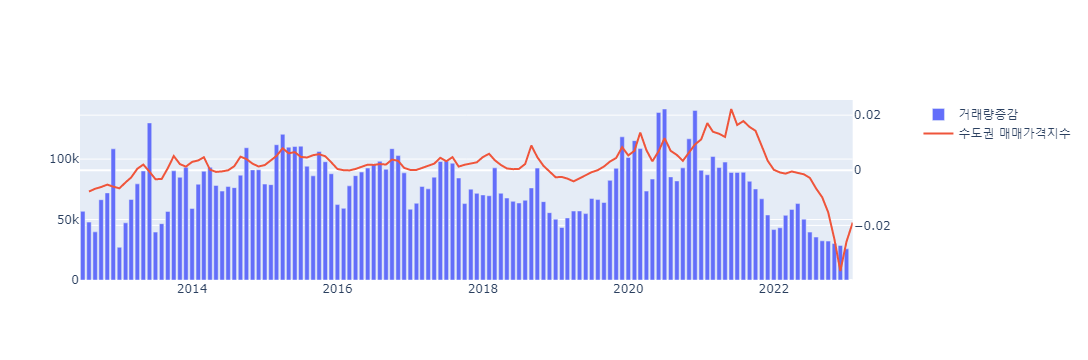

In [3]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

fig = make_subplots(specs=[[{"secondary_y":True}]])

fig.add_trace(go.Bar(x=주택매매거래량_df.index.values, y=주택매매거래량_df['전국'], name="거래량증감"),secondary_y=False)
fig.add_trace(go.Scatter(x=수도권아파트매매가_df.index.values, y=수도권아파트매매가_df['수도권 매매가격지수'].pct_change(), name='수도권 매매가격지수'),secondary_y=True)

fig.show()  

* 가격 하강 국면에 반짝 거래량이 치솟는 경향이 있음

****

****

# 기준금리와 Cofix

* **Cofix**
    - 은행 대출금리의 기준이 되는 자금조달비용지수 
    - 은행들은 코픽스에 대출자의 신용도를 반영하여 일정률의 가산금리(spread)를 더해 대출금리로 결정
    - 대출받는 입장에서 본다면 금리 상승기엔 잔액 기준 코픽스가 신규 취급액 기준 코픽스보다 유리

In [4]:
pd.options.plotting.backend = "plotly"

In [5]:
# 기준금리_df = 기준금리_df.set_index('Unnamed: 0')
cofix_df[:5]

공시일  신규취급액기준 COFIX  잔액기준 COFIX 신 잔액기준 COFIX
Unnamed: 0                                                    
2012-07-01  2012/08/16           3.40        3.85            -
2012-08-01  2012/09/17           3.18        3.78            -
2012-09-01  2012/10/15           3.18        3.72            -
2012-10-01  2012/11/15           3.08        3.64            -
2012-11-01  2012/12/17           3.01        3.57            -

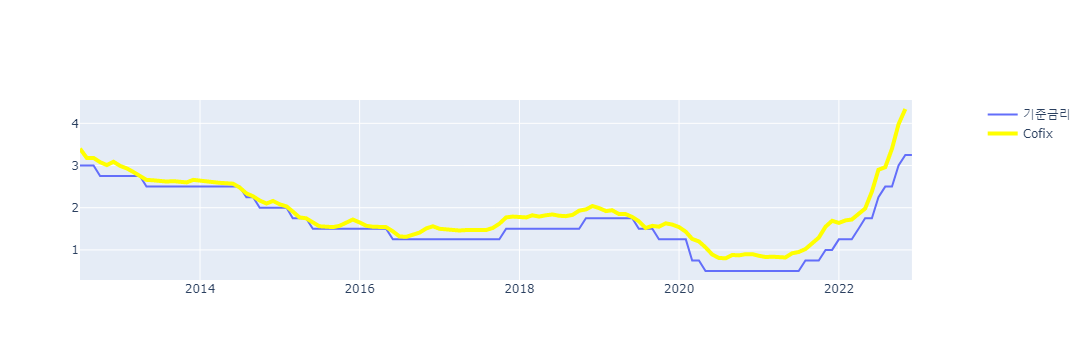

In [6]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

fig = make_subplots(specs=[[{"secondary_y":True}]])
fig.add_trace(go.Scatter(x=기준금리_df.index.values, y=기준금리_df['기준금리'],name='기준금리'))
fig.add_trace(
    go.Scatter(x=기준금리_df.index.values, y=cofix_df['신규취급액기준 COFIX'], name="Cofix",
               line={'color':'yellow','width':4 }),secondary_y=False)

fig.show()

## 고정금리 변동금리

### 예금은행 고정 / 변동 금리 비중

* 이상적으로 대출자들은 고금리 시대엔 고정금리를, 저금리 시대엔 변동금리를 추구한다.

In [7]:
고정변동_df=고정변동_df[2:]

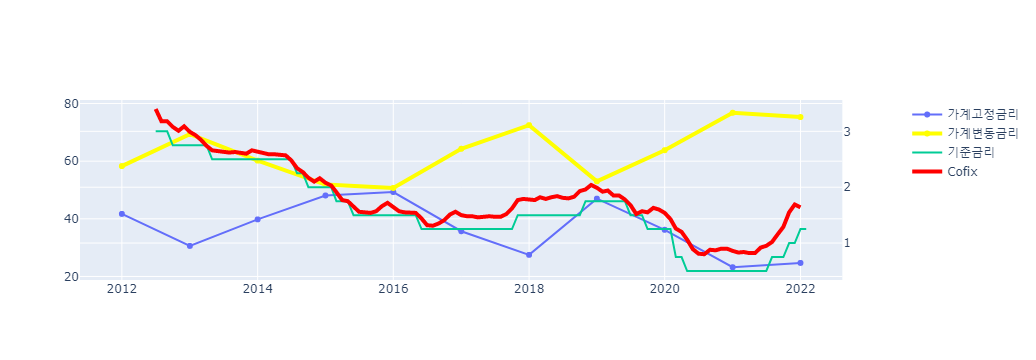

In [37]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

fig = make_subplots(specs=[[{"secondary_y":True}]])
fig.add_trace(go.Scatter(x=고정변동_df.index.values, y=고정변동_df['가계_고정금리'],name='가계고정금리'))
fig.add_trace(
    go.Scatter(x=고정변동_df.index.values, y=고정변동_df['가계_변동금리'], name="가계변동금리",
               line={'color':'yellow','width':4 }),secondary_y=False)

fig.add_trace(go.Scatter(x=기준금리_df.index.values, y=기준금리_df['기준금리'][:-10],name='기준금리'),secondary_y=True)
fig.add_trace(
    go.Scatter(x=기준금리_df.index.values, y=cofix_df['신규취급액기준 COFIX'][:-10], name="Cofix",
               line={'color':'red','width':4 }),secondary_y=True)

# fig.update_layout(
#     autosize=False,
#     width=1500,
#     height=500)
fig.show()

* 기준금리 하락시기에 점차 고정금리 비중이 커지는 양상이 있긴 하지만, 대체로 변동금리가 우세한 현상
* 생각보다 금리에 민감하게 변화하는 모습은 적다. 이유는?

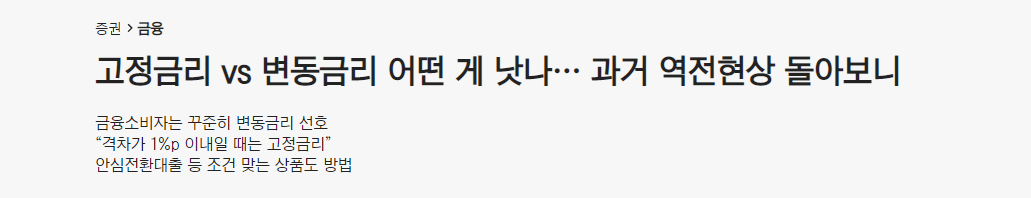
- ref: https://biz.chosun.com/stock/finance/2022/09/12/FBSR4HOGCBDEBGQJVBPF4TZ6CU/

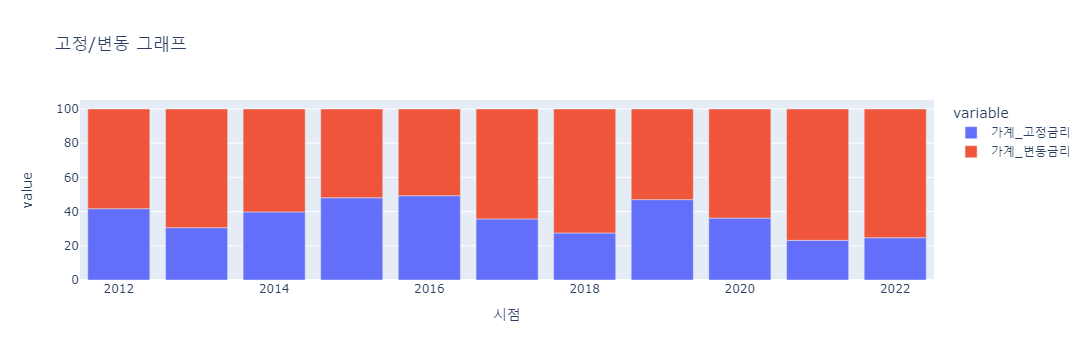

In [9]:
import plotly.express as px

fig = px.bar(고정변동_df, title="고정/변동 그래프")
fig.show()  

* 고정금리와 변동금리 비중
    - 19년 2월 이후 1 이하의 금리 하향세 --> 그래도 변동금리 비중이 점점 커짐

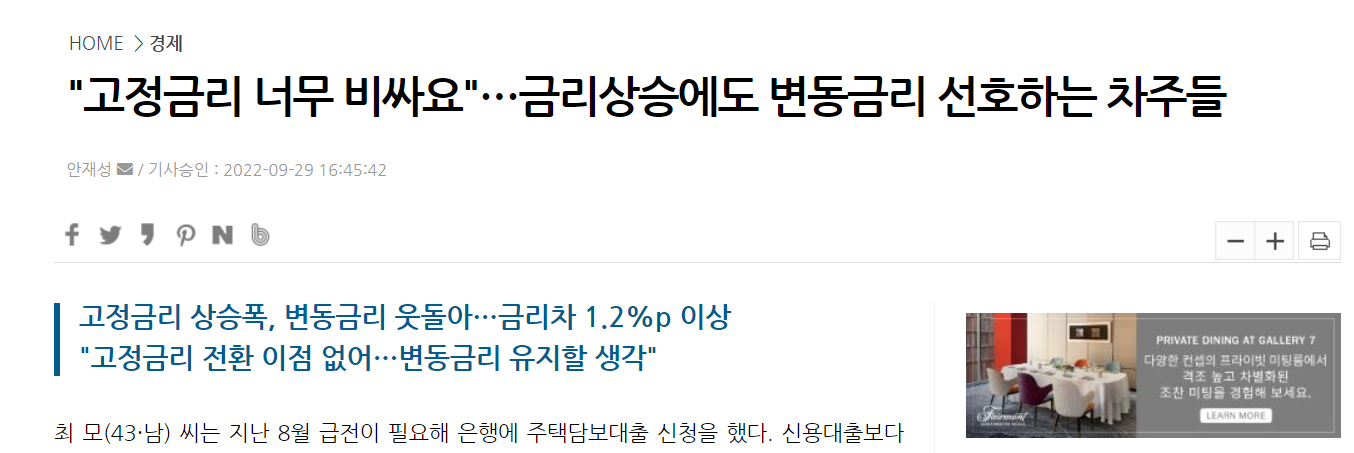

ref:https://www.upinews.kr/newsView/upi202209290044

- 기준금리 낮을 때 --> 변동금리 비중은 커지고, 고정금리 비중은 작아지는 양상이 있다.  
- 그러나 고정금리가 변동금리보다 비싸다는 이유로, 기준 금리 상승세가 약하면 금리가 인상됨에도 변동금리를 대체로 선호한다

****

****

# 부동산 관련 지표

    - 주택동향
    - 심리지수
    - 압력지수
    - K-REMAP

## 주택동향
    - 전체 주택 중 대표성을 가진 표본을 선정하여 주택가격을 조사하는 조사 통계
    - 실거래 가격지수 : 실제 거래되어 신고된 주택가격을 활용하는 가공통계

### 수도권 평균 동향

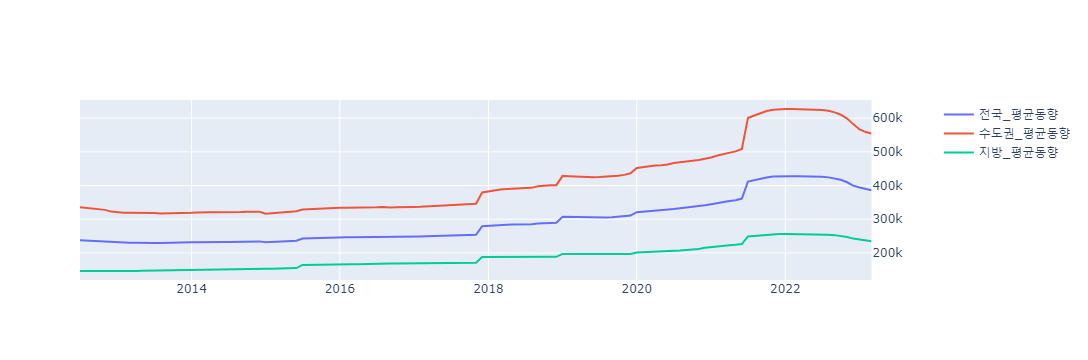

In [10]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

fig = make_subplots(specs=[[{"secondary_y":True}]])

# fig.add_trace(go.Scatter(x=기준금리_df.index.values, y=기준금리_df['기준금리'],name='한국은행_기준금리'),secondary_y=False)
# fig.add_trace(go.Scatter(x=주담대금리_df.index.values, y=주담대금리_df['주담대금리'], name='주담대금리'),secondary_y=False)
fig.add_trace(go.Scatter(x=평균가격_주택동향_df.index.values, y=평균가격_주택동향_df['전국_평균동향'], name='전국_평균동향'),secondary_y=True)
fig.add_trace(go.Scatter(x=평균가격_주택동향_df.index.values, y=평균가격_주택동향_df['수도권_평균동향'], name='수도권_평균동향'),secondary_y=True)
fig.add_trace(go.Scatter(x=평균가격_주택동향_df.index.values, y=평균가격_주택동향_df['지방_평균동향'], name='지방_평균동향'),secondary_y=True)

fig.show()  

### 수도권 중위 동향

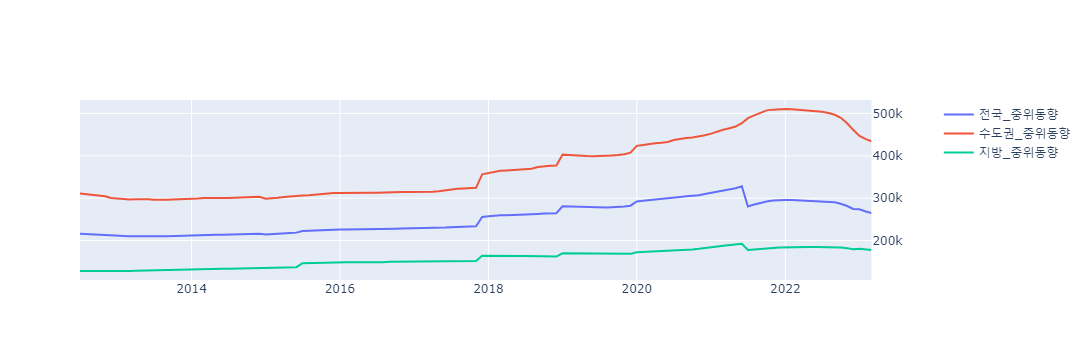

In [11]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

fig = make_subplots(specs=[[{"secondary_y":True}]])

# fig.add_trace(go.Scatter(x=기준금리_df.index.values, y=기준금리_df['기준금리'],name='한국은행_기준금리'),secondary_y=False)
# fig.add_trace(go.Scatter(x=주담대금리_df.index.values, y=주담대금리_df['주담대금리'], name='주담대금리'),secondary_y=False)
fig.add_trace(go.Scatter(x=중위가격_주택동향_df.index.values, y=중위가격_주택동향_df['전국_중위동향'], name='전국_중위동향'),secondary_y=True)
fig.add_trace(go.Scatter(x=중위가격_주택동향_df.index.values, y=중위가격_주택동향_df['수도권_중위동향'], name='수도권_중위동향'),secondary_y=True)
fig.add_trace(go.Scatter(x=중위가격_주택동향_df.index.values, y=중위가격_주택동향_df['지방_중위동향'], name='지방_중위동향'),secondary_y=True)

fig.show()  

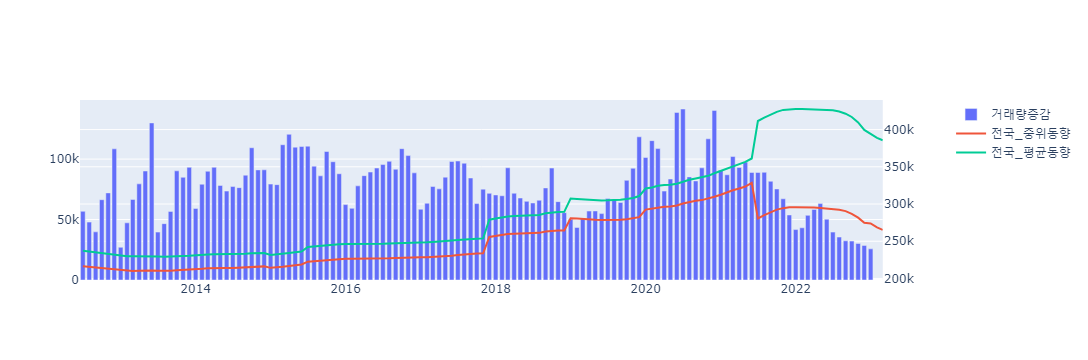

In [12]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

fig = make_subplots(specs=[[{"secondary_y":True}]])

fig.add_trace(go.Bar(x=주택매매거래량_df.index.values, y=주택매매거래량_df['전국'], name="거래량증감"),secondary_y=False)
fig.add_trace(go.Scatter(x=중위가격_주택동향_df.index.values, y=중위가격_주택동향_df['전국_중위동향'], name='전국_중위동향'),secondary_y=True)
fig.add_trace(go.Scatter(x=평균가격_주택동향_df.index.values, y=평균가격_주택동향_df['전국_평균동향'], name='전국_평균동향'),secondary_y=True)

fig.show()  

* 21년 6월 이후 중위 격차가 벌어짐 --> 부동산 시장 과열로 가격에 거품이 반영되면서, 중위가격이 무너지고 부동산 가격차가 심화됐다. 

****

## 부동산 심리지수 변화

### 기준금리와 압력지수, 소비자 심리지수

>**소비자 심리지수** :  가격과 거래에 대한 정보를 가지고 있음
- 100보다 높으면 전월에 비해 가격이나 거래가 상승 또는 증가하였다는 응답자가 많음을 의미
- 95 미만이면 하강국면, 95~115 사이는 보합국면, 115 이상이면 상승국면으로 분류
- 소비자들의 판단과 움직임을 확인할 수 있는 정성적 지표인 동시에 시장의 방향을 예측할 수 있는 지표로 활용 가능

>**부동산 시장 압력** : 시장의 확장 혹은 침체를 야기하는 압력
- 압력지수 : 크면 시장 확장, 작아지면 침체 위험 증가
    - 경기동행지수 변동률, M2 변동률, 매수매도지수, 미분양주택수, 주택담보대출금리 등을 이용하여 산출
    - 95 미만이면 하강국면, 95~115 사이는 보합국면, 115 이상이면 상승국면으로 분류
- 현재 전반적 경제 상황이 부동산 가격에 얼마나, 어떤 방향으로 영향을 미치는지 나타냄

> **K_REMAP** 
- 소비자 심리지수+부동산 시장 압력

*****

## K_REMAP, 압력지수, 소비심리지수

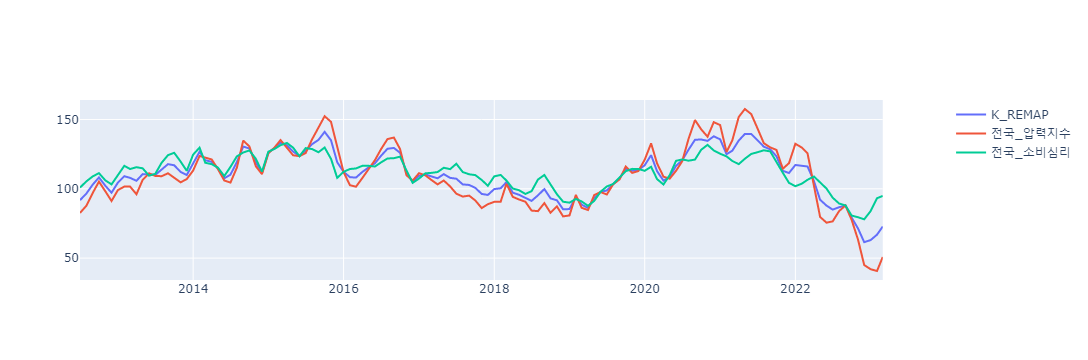

In [14]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

fig = make_subplots(specs=[[{"secondary_y":True}]])

fig.add_trace(go.Scatter(x=K_REMAP_df.index.values, y=K_REMAP_df['전국'], name="K_REMAP"),secondary_y=False)
fig.add_trace(go.Scatter(x=압력지수_df.index.values, y=압력지수_df['전국_압력지수'], name="전국_압력지수"),secondary_y=False)
fig.add_trace(go.Scatter(x=소비심리지수_df.index.values, y=소비심리지수_df['전국_소비심리'], name="전국_소비심리"),secondary_y=False)

fig.show()  

* 비슷한 양상

*****

### 기준금리, 압력지수, 소비심리지수

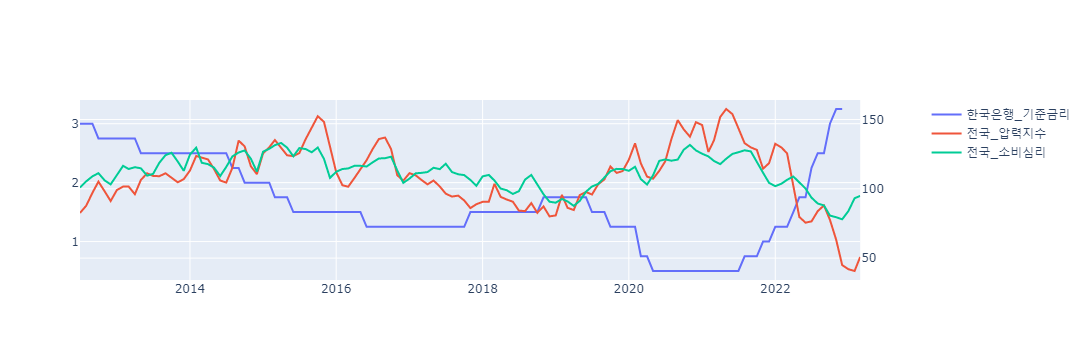

In [15]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots


fig = make_subplots(specs=[[{"secondary_y":True}]])
fig.add_trace(go.Scatter(x=기준금리_df.index.values, y=기준금리_df['기준금리'],name='한국은행_기준금리'),secondary_y=False)
fig.add_trace(go.Scatter(x=압력지수_df.index.values, y=압력지수_df['전국_압력지수'], name="전국_압력지수"),secondary_y=True)
fig.add_trace(go.Scatter(x=소비심리지수_df.index.values, y=소비심리지수_df['전국_소비심리'], name="전국_소비심리"),secondary_y=True)

# fig.add_trace(go.Scatter(x=주택매매거래량_df.index.values, y=주택매매거래량_df['전국'], name="거래량증감"),secondary_y=True)

fig.show()  

- **기준금리와 압력지수 반대로 움직임**
    - 기준금리가 낮아진다는 것은 이자율이 낮아진다는 것 -> 시장 활성화

### 매매가, 압력지수, 소비심리지수

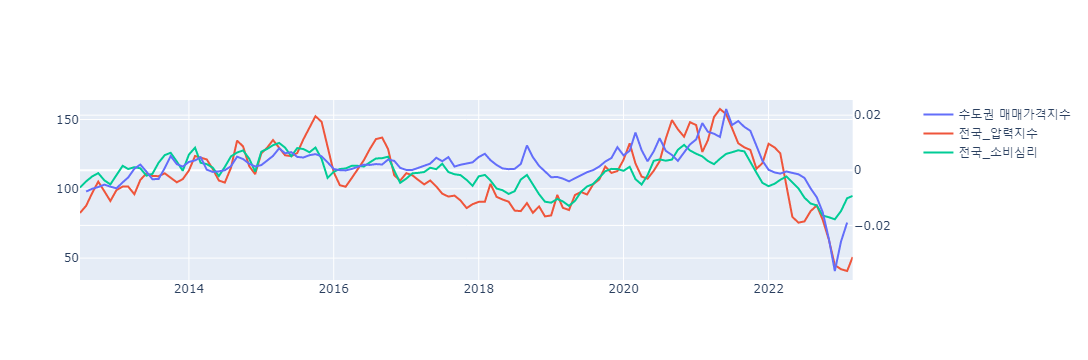

In [16]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

fig = make_subplots(specs=[[{"secondary_y":True}]])

fig.add_trace(go.Scatter(x=수도권아파트매매가_df.index.values, y=수도권아파트매매가_df['수도권 매매가격지수'].pct_change(), name='수도권 매매가격지수'),secondary_y=True)
fig.add_trace(go.Scatter(x=압력지수_df.index.values, y=압력지수_df['전국_압력지수'], name="전국_압력지수"),secondary_y=False)
fig.add_trace(go.Scatter(x=소비심리지수_df.index.values, y=소비심리지수_df['전국_소비심리'], name="전국_소비심리"),secondary_y=False)


fig.show()  

* 부동산 침체기였던 2012-2016년 이전까지는 시장이 침체되어 있기 때문에, 가격이 심리지수를 따라가지만  
    16년 이후 부동산 시장이 살아나면서 시장이 활성화되고, 가격지수가 선행되거나 심리지수에 민감한 반응을 보인다.

******

******

# 부동산 정책에 따른 시장 변화

## 정책 변수

- 2015 : 민간택지 분양가 상한제 폐지, 주택시장 회복 심리가 확산된데다 저금리 기조와 전세난으로 실수요자가 주택 구매 등으로 호기
- 2016 : 주택담보대출 규제 강화와 공급과잉 우려 등으로 연초 숨 고르기 장세로 시작
    - ‘여신심사 선진화 가이드라인’: 대출규제 강화(https://www.hankyung.com/realestate/article/201612088706e)
- 2019.8 : 국토교통부가  민간택지 아파트에 대한 '분양가 상한제' -> 고조되는 경제 지표상 부동산 상승 압력을 고려한 것으로 분석
    - 시장이 지나치게 과열되거나 확장되는 것을 막기위해 정부에서 규제
- 2022 : 주택시장 소비심리는 금리 인상에 따른 거래 절벽, 이로 인한 집값 하락으로 전국적으로 지난 8월부터 3개월 연속 하강국면(http://www.seoulfn.com)

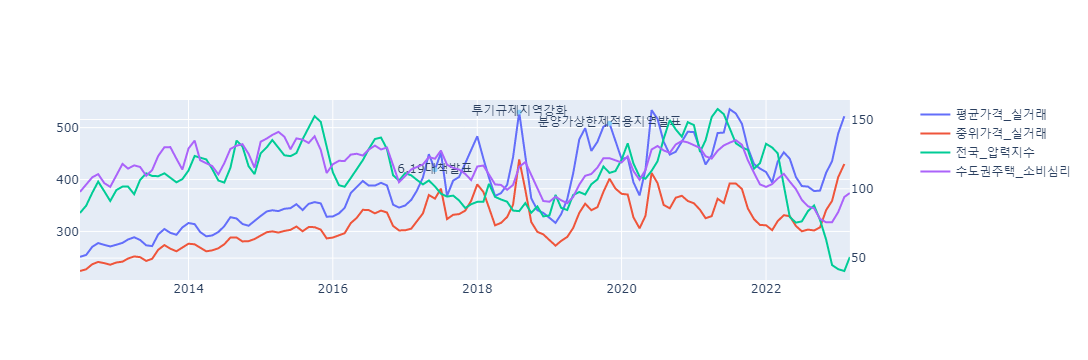

In [20]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from plotly.graph_objs.layout import Annotation


fig = make_subplots(specs=[[{"secondary_y":True}]])

# fig.add_trace(go.Scatter(x=수도권아파트매매가_df.index.values, y=수도권아파트매매가_df['수도권 매매가격지수'], name='수도권 매매가격지수'),secondary_y=True)
# fig.add_trace(go.Scatter(x=기준금리_df.index.values, y=기준금리_df['기준금리'],name='한국은행_기준금리'),secondary_y=True)
fig.add_trace(go.Scatter(x=평균가격_실거래_df.index.values, y=평균가격_실거래_df['전국_평실'], name="평균가격_실거래"),secondary_y=False)
fig.add_trace(go.Scatter(x=중위가격_실거래_df.index.values, y=중위가격_실거래_df['전국_중실'], name="중위가격_실거래"),secondary_y=False)
fig.add_trace(go.Scatter(x=압력지수_df.index.values, y=압력지수_df['전국_압력지수'], name="전국_압력지수"),secondary_y=True)
fig.add_trace(go.Scatter(x=주택시장_소비심리지수_df.index.values, y=주택시장_소비심리지수_df['수도권주택_소비심리'], name="수도권주택_소비심리"),secondary_y=True)
fig.add_trace(go.Scatter(mode='markers+text',x=['2018-08-01'],y=평균가격_실거래_df['전국_평실'][평균가격_실거래_df.index=='2018-08-01'],marker=dict(color='LightSkyBlue',size=5),text=["투기규제지역강화"],showlegend=False))
fig.add_trace(go.Scatter(mode='markers+text',x=['2019-11-01'],y=평균가격_실거래_df['전국_평실'][평균가격_실거래_df.index=='2019-11-01'],marker=dict(color='LightSkyBlue',size=5),text=["분양가상한제적용지역발표"],showlegend=False))
fig.add_trace(go.Scatter(mode='markers+text',x=['2017-06-01'],y=평균가격_실거래_df['전국_평실'][평균가격_실거래_df.index=='2017-06-01'],marker=dict(color='LightSkyBlue',size=5),text=["6.19대책발표"],showlegend=False))
fig.show()

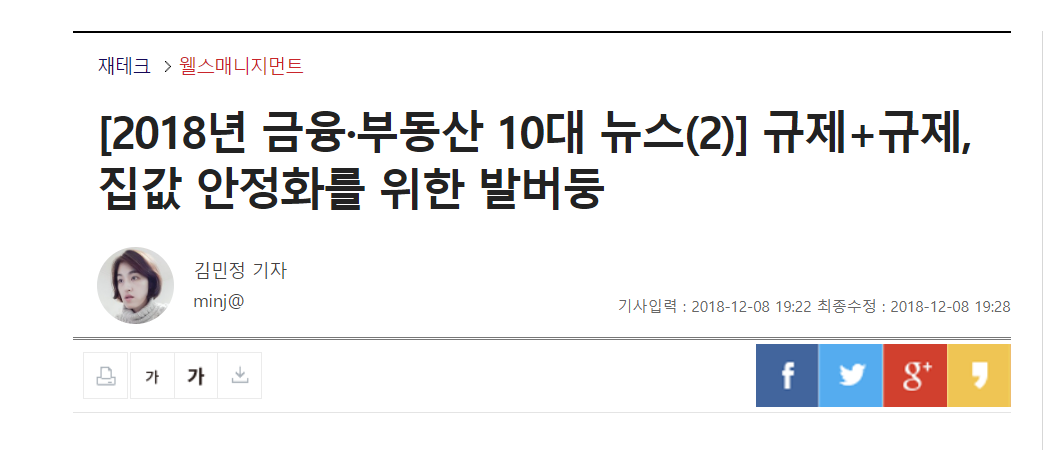

- ref : https://www.fntimes.com/html/view.php?ud=201812072153516242dd55077bc2_18

****

****

# 기준금리와 주택담보대출

- 부동산은 대출 없이 보유하기 힘든 자산
- 주택담보금리는 기준금리를 따라간다
- 2022년의 경우 정부의 급격한 금리인상으로 주택 매매량 및 전세 가격 하락


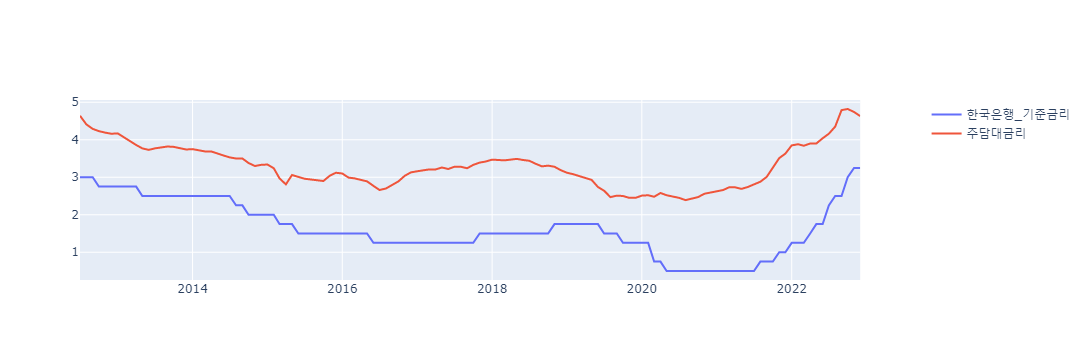

In [19]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

fig = make_subplots(specs=[[{"secondary_y":True}]])

# fig.add_trace(go.Scatter(x=수도권아파트매매가_df.index.values, y=수도권아파트매매가_df['수도권 매매가격지수'], name='수도권 매매가격지수'),secondary_y=True)
fig.add_trace(go.Scatter(x=기준금리_df.index.values, y=기준금리_df['기준금리'],name='한국은행_기준금리'),secondary_y=False)
fig.add_trace(go.Scatter(x=주담대금리_df.index.values, y=주담대금리_df['주담대금리'], name='주담대금리'),secondary_y=False)
fig.show()  

## 주택담보대출 : DSR , LTV, DTI

    - 대출 금액 제한 기준
    - LTV(주택 담보인정비율) : 집 값 대비 얼마까지 대출이 가능한지? (40~70%로 제한)
    - DTI(총부채 상환비율) : 소득 대비 대출 상환 능력이 얼마나 되는지? (40~70%로 제한)
    - DSR(총체적 상환능력 비율) : 상환 능력 기준에 내가 가진 빚을 포함하는 것 

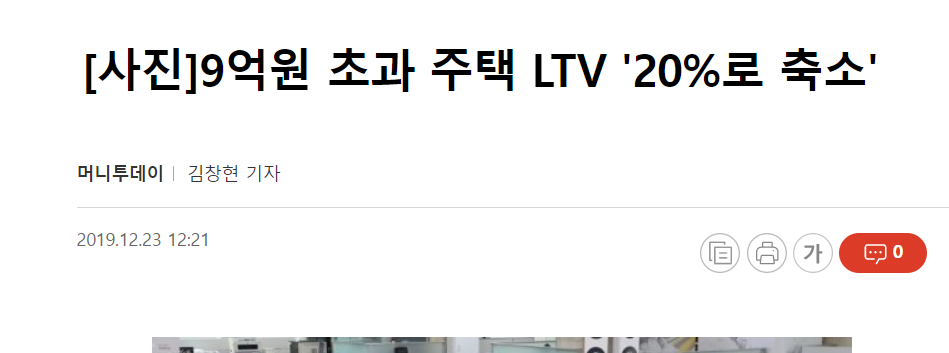

ref : https://news.mt.co.kr/mtview.php?no=2019122312151118905

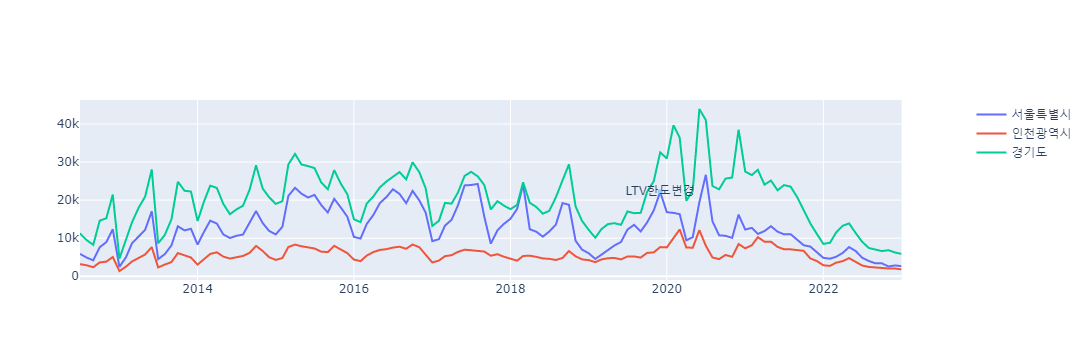

In [21]:
fig = make_subplots(specs=[[{"secondary_y":True}]])
fig.add_trace(go.Scatter(x=아파트매매거래량_증감_df.index.values, y=아파트매매거래량_증감_df['서울특별시'],name='서울특별시'))
fig.add_trace(go.Scatter(x=아파트매매거래량_증감_df.index.values, y=아파트매매거래량_증감_df['인천광역시'],name='인천광역시'))
fig.add_trace(go.Scatter(x=아파트매매거래량_증감_df.index.values, y=아파트매매거래량_증감_df['경기도'],name='경기도'),secondary_y=False)
fig.add_trace(go.Scatter(mode='markers+text',x=['2019-12-01'],y=아파트매매거래량_증감_df['서울특별시'][아파트매매거래량_증감_df.index=='2019-12-01'],marker=dict(color='LightSkyBlue',size=5),text=["LTV한도변경"],showlegend=False))

* LTV 한도 20% 까지 내리는 규제를 기점으로 거래량 급감

### 주택담보금리와 주택동향

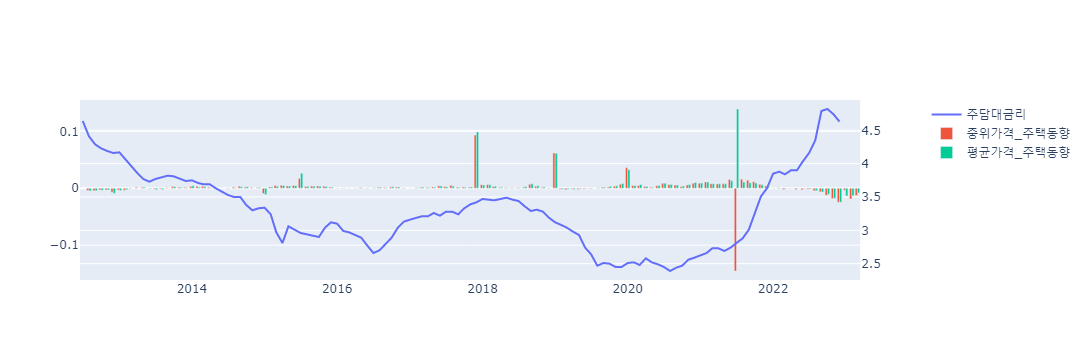

In [24]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

fig = make_subplots(specs=[[{"secondary_y":True}]])

# fig.add_trace(go.Scatter(x=기준금리_df.index.values, y=기준금리_df['기준금리'],name='한국은행_기준금리'),secondary_y=True)
fig.add_trace(go.Scatter(x=주담대금리_df.index.values, y=주담대금리_df['주담대금리'], name='주담대금리'),secondary_y=True)
fig.add_trace(go.Bar(x=중위가격_주택동향_df.index.values, y=중위가격_주택동향_df['전국_중위동향'].pct_change(), name='중위가격_주택동향'),secondary_y=False)
fig.add_trace(go.Bar(x=중위가격_주택동향_df.index.values, y=평균가격_주택동향_df['전국_평균동향'].pct_change(), name='평균가격_주택동향'),secondary_y=False)
# fig.add_trace(go.Scatter(mode='markers+text',x=['2021-06-01'],y=중위가격_주택동향_df['전국_중위동향'][중위가격_주택동향_df.index=='2021-06-01'],marker=dict(color='LightSkyBlue',size=5),text=["3종 규제"],showlegend=True))
# fig.add_trace(go.Scatter(x=중위가격_실거래_df.index.values, y=중위가격_실거래_df['전국_중실'], name='중위가격_실거래'),secondary_y=True)

fig.show()  

- **2021년 6월 3가지 규제** (https://realty.chosun.com/site/data/html_dir/2021/05/30/2021053001174.html)

- 주택담보금리의 변화 자체는 부동산 가격에 영향이 적다.
- 정책에 따른 변화가 더 민감하다.

### 기준금리, 주택담보금리, 거래량

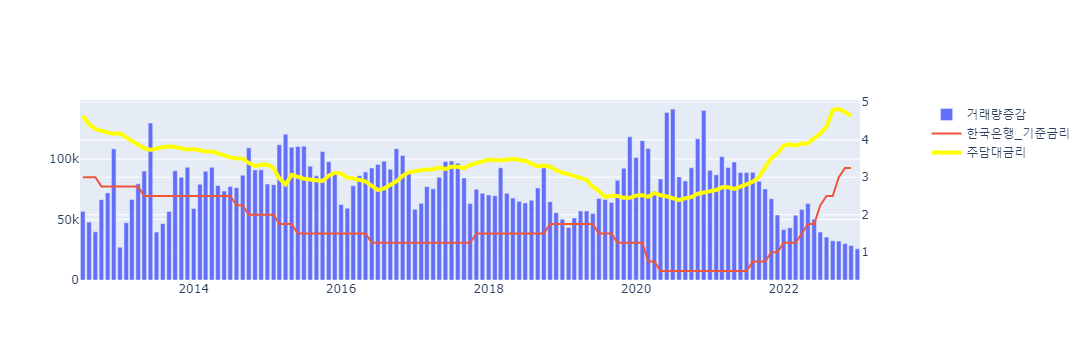

In [25]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

fig = make_subplots(specs=[[{"secondary_y":True}]])

fig.add_trace(go.Bar(x=주택매매거래량_df.index.values, y=주택매매거래량_df['전국'], name="거래량증감"),secondary_y=False)
fig.add_trace(go.Scatter(x=기준금리_df.index.values, y=기준금리_df['기준금리'],name='한국은행_기준금리'),secondary_y=True)
fig.add_trace(go.Scatter(x=주담대금리_df.index.values, y=주담대금리_df['주담대금리'], name='주담대금리',line={'color':'yellow','width':4 }),secondary_y=True)
# fig.add_trace(go.Scatter(x=수도권아파트매매가_df.index.values, y=수도권아파트매매가_df['수도권 매매가격지수'].pct_change(), name='수도권 매매가격지수'),secondary_y=True)

fig.show()  

## 다양한 부동산 지수에 영향을 주는 심리 지수

* 부동산은 기준금리 변동에 직접적인 영향을 받는다기보다는, 기준금리 변동이 반영된 **소비심리지수와 파생변수**에 더 큰 영향을 받는다.
    - 부동산 침체기였던 2012-2016년 이전까지는 시장이 침체되어 있기 때문에 압력지수보다 심리지수가 높지만,
    - 16년 이후 부동산 시장이 살아나면서 시장이 활성화되고, 심리지수가 빠르게 거래량에 반영되고 압력지수가 심리지수보다 높은 양상이다.

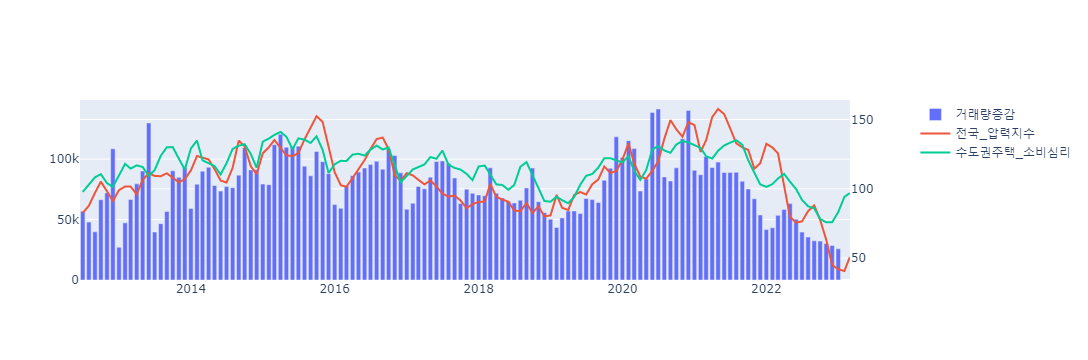

In [30]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

fig = make_subplots(specs=[[{"secondary_y":True}]])

# fig.add_trace(go.Scatter(x=수도권아파트매매가_df.index.values, y=수도권아파트매매가_df['수도권 매매가격지수'], name='수도권 매매가격지수'),secondary_y=True)
# fig.add_trace(go.Scatter(x=기준금리_df.index.values, y=기준금리_df['기준금리'],name='한국은행_기준금리'),secondary_y=True)
fig.add_trace(go.Bar(x=아파트매매거래량_증감_df.index.values, y=아파트매매거래량_증감_df['전국'], name="거래량증감"),secondary_y=False)
fig.add_trace(go.Scatter(x=압력지수_df.index.values, y=압력지수_df['전국_압력지수'], name="전국_압력지수"),secondary_y=True)
fig.add_trace(go.Scatter(x=주택시장_소비심리지수_df.index.values, y=주택시장_소비심리지수_df['수도권주택_소비심리'], name="수도권주택_소비심리"),secondary_y=True)



fig.show()  

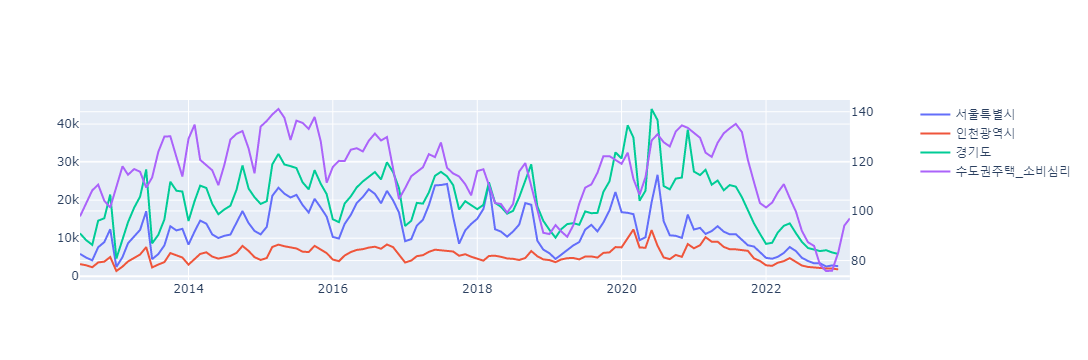

In [31]:
fig = make_subplots(specs=[[{"secondary_y":True}]])
fig.add_trace(go.Scatter(x=아파트매매거래량_증감_df.index.values, y=아파트매매거래량_증감_df['서울특별시'],name='서울특별시'))
fig.add_trace(go.Scatter(x=아파트매매거래량_증감_df.index.values, y=아파트매매거래량_증감_df['인천광역시'],name='인천광역시'))
fig.add_trace(go.Scatter(x=아파트매매거래량_증감_df.index.values, y=아파트매매거래량_증감_df['경기도'],name='경기도'),secondary_y=False)
fig.add_trace(go.Scatter(x=주택시장_소비심리지수_df.index.values, y=주택시장_소비심리지수_df['수도권주택_소비심리'],name='수도권주택_소비심리'),secondary_y=True)

* 부동산 침체기와 상승기 모두, 실 거래량과 심리지수의 차이가 큰 양상을 보인다.

## 핵심은 정책 변수

- 거래 절벽 : 새로운 부동산 대책이 나오면 일시적으로 부동산 거래가 활발해졌다가 법 시행이 끝나면 거래가 곧 끊기는 현상
    - 2012년 9월부터 연말까지 부동산 취득세를 감면하여 주는 정책을 시행하자 거래가 늘었다가 정책 시행이 끝난 2013년 1월에 부동산 거래가 크게 줄어든 경우
    - 2022년 (https://biz.heraldcorp.com/view.php?ud=20220903000074)
        -  총부채원리금상환비율(DSR) 규제가 적용(http://www.newsprime.co.kr/news/article/?no=579248)
        -  1-3월 대통령 선거와 이에 따른 부동산 규제 완화로 4-6월 서서히 회복하는 모습
        - 금리 인상 :  금리 인상으로 원리금 상환 부담이 커진 것
        - 고물가, 경기 침체 우려 등이 맞물리면서 하락세를 보임 
        

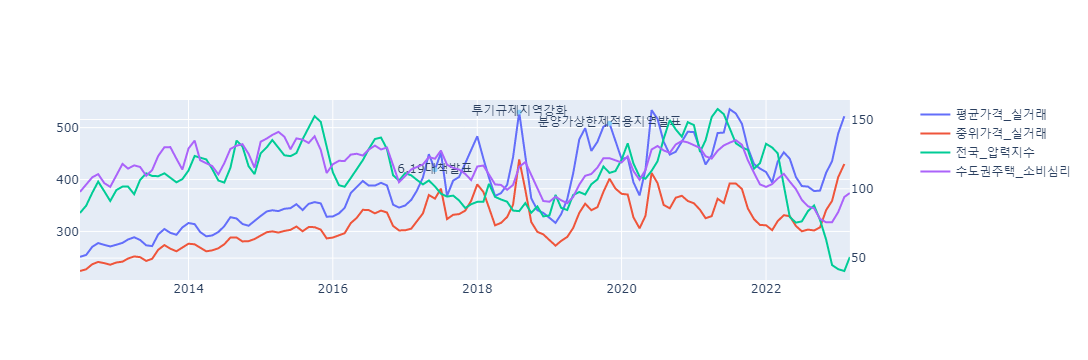

In [32]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from plotly.graph_objs.layout import Annotation


fig = make_subplots(specs=[[{"secondary_y":True}]])

# fig.add_trace(go.Scatter(x=수도권아파트매매가_df.index.values, y=수도권아파트매매가_df['수도권 매매가격지수'], name='수도권 매매가격지수'),secondary_y=True)
# fig.add_trace(go.Scatter(x=기준금리_df.index.values, y=기준금리_df['기준금리'],name='한국은행_기준금리'),secondary_y=True)
fig.add_trace(go.Scatter(x=평균가격_실거래_df.index.values, y=평균가격_실거래_df['전국_평실'], name="평균가격_실거래"),secondary_y=False)
fig.add_trace(go.Scatter(x=중위가격_실거래_df.index.values, y=중위가격_실거래_df['전국_중실'], name="중위가격_실거래"),secondary_y=False)
fig.add_trace(go.Scatter(x=압력지수_df.index.values, y=압력지수_df['전국_압력지수'], name="전국_압력지수"),secondary_y=True)
fig.add_trace(go.Scatter(x=주택시장_소비심리지수_df.index.values, y=주택시장_소비심리지수_df['수도권주택_소비심리'], name="수도권주택_소비심리"),secondary_y=True)
fig.add_trace(go.Scatter(mode='markers+text',x=['2018-08-01'],y=평균가격_실거래_df['전국_평실'][평균가격_실거래_df.index=='2018-08-01'],marker=dict(color='LightSkyBlue',size=5),text=["투기규제지역강화"],showlegend=False))
fig.add_trace(go.Scatter(mode='markers+text',x=['2019-11-01'],y=평균가격_실거래_df['전국_평실'][평균가격_실거래_df.index=='2019-11-01'],marker=dict(color='LightSkyBlue',size=5),text=["분양가상한제적용지역발표"],showlegend=False))
fig.add_trace(go.Scatter(mode='markers+text',x=['2017-06-01'],y=평균가격_실거래_df['전국_평실'][평균가격_실거래_df.index=='2017-06-01'],marker=dict(color='LightSkyBlue',size=5),text=["6.19대책발표"],showlegend=False))
fig.show()

* 수많은 지표 중 상대적으로 크게 영향을 주는 변수는 **정책변수**이다.

****

****

# 결론

- 부동산 시장에 금리 변동은 간접적인 영향이나, 대출금리 변동은 기준금리 변동에 직접적 영향을 받을 수 있다.
- 대출 없이 부동산을 구매할 수 없기 때문에, 대출이 가장 큰 변수로 작용한다.
- 매수자들은 금리 변동 1%p 정도에는 크게 동요하지 않고, 오히려 정책 변수가 등장했을 때 거래량은 급격히 변하고, 이에 가격에 급격히 반영된다.